In [1]:
from mylib.statistic_test import *
from sklearn.decomposition import PCA
# Import isomap
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
from umap.umap_ import UMAP
from mazepy.basic._time_sync import _coordinate_recording_time
from mazepy.datastruc.neuact import SpikeTrain, NeuralTrajectory
from mazepy.datastruc.variables import VariableBin

code_id = "0866 - Starting Point Manifolds"
loc = os.path.join(figpath, "Dsp", code_id)
mkdir(loc)

dir_name = join(figpath, "Dsp", "Reforming Neural Trajectory Analysis") 

        E:\Data\FinalResults\Dsp\0866 - Starting Point Manifolds is already existed!


In [7]:
def dim_red(mouse: int, session: int, is_control: bool = False):
    with open(join(dir_name, f"{mouse}.pkl"), 'rb') as f:
        res = pickle.load(f)
        
    neural_traj = res['neural_traj']
    route_traj = res['route_traj']
    nodes_traj = res['pos_traj']
    father_nodes_traj = S2F[nodes_traj-1]
    lap_traj = res['lap_traj']
    time_traj = res['time_traj']
    
    if is_control:
        concatenated_idx = np.concatenate([
            np.where((route_traj == 0) & (np.isin(father_nodes_traj, CP_DSP[0][10+i:30+i])))[0] for i in [0, 25, 50, 75]
        ])
        routes_visualize = np.zeros_like(concatenated_idx)
        routes_convert = [1, 2, 4, 5]
        for i in range(4):  
            routes_visualize[np.isin(father_nodes_traj[concatenated_idx], CP_DSP[0][10+i*25:30+i*25])] = routes_convert[i]
    else:
        concatenated_idx = np.concatenate([
            np.where((route_traj == i) & (np.isin(father_nodes_traj, CP_DSP[i][:20])))[0] for i in [1, 2, 4, 5]
        ])
        routes_visualize = route_traj[concatenated_idx]
    
    if concatenated_idx.shape[0] > 20000:
        # Downsample but remain order
        np.random.seed(42)
        rand_idx = np.random.choice(np.arange(concatenated_idx.shape[0]), size=20000, replace=False)
        concatenated_idx = concatenated_idx[rand_idx]
        routes_visualize = routes_visualize[rand_idx]
    
    neural_traj = neural_traj[:, concatenated_idx]
    route_traj = route_traj[concatenated_idx]
    nodes_traj = nodes_traj[concatenated_idx]
    father_nodes_traj = father_nodes_traj[concatenated_idx]
    lap_traj = lap_traj[concatenated_idx]
    time_traj = time_traj[concatenated_idx]

    n_component_pca = 30
    n_component_isomap = 2
    n_neighbors = 20
    
    # Dimensionality Reduction
    pca = PCA(n_components=n_component_pca)
    denoised_data = pca.fit_transform(neural_traj.T)
    t1 = time.time()
    print(f"Isomap [Size - {denoised_data.shape[0]}]\n{DateTime()} -> ", end=' ')
    isomap = UMAP(n_components=n_component_isomap, n_neighbors=n_neighbors)
    isomap_data = isomap.fit_transform(denoised_data)
    print(f"{DateTime()}")
    print(f"  Cost: {time.time() - t1:.3f} seconds")

    x, y = isomap_data[:, 0], isomap_data[:, 1]
    fig = plt.figure(figsize=(5, 5))
    ax = Clear_Axes(plt.axes())
    ax.axvline(0, color='k', linestyle='--', linewidth=0.5)
    ax.axhline(0, color='k', linestyle='--', linewidth=0.5)
    ax.scatter(x, y, c=DSPPaletteRGBA[routes_visualize], s=3, linewidths=0, edgecolors=None)
    plt.show()
    return isomap_data, isomap

Isomap [Size - 18390]
2025-07-05 13:35:20 ->  2025-07-05 13:35:40
  Cost: 19.996 seconds


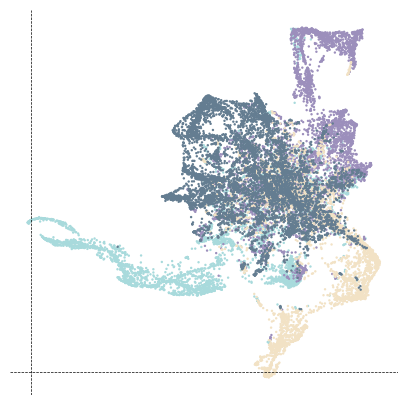

In [3]:
isomap_data, isomap_model = dim_red(10232, 0)

Isomap [Size - 20000]
2025-07-05 13:38:32 ->  2025-07-05 13:38:39
  Cost: 6.964 seconds


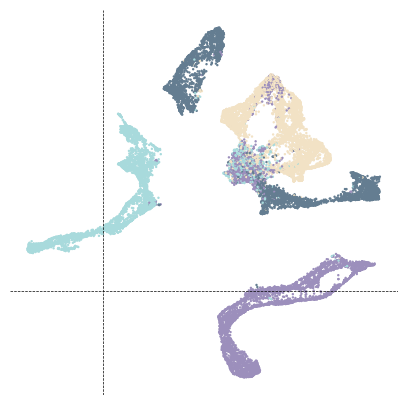

In [8]:
isomap_data_ctrl, isomap_model_ctrl = dim_red(10232, 0, is_control=True)